## Group 5 Customer Segmentation Analysis Part 2

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import the appropriate Libraries
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import numpy as np

In [3]:
# Load rfm data from Part 1
rfm = pd.read_csv('/content/drive/MyDrive/DAB_303/rfm.csv', index_col ='CustomerID')

In [4]:
rfm.head()

,recency,frequency,monetary
CustomerID,,,
13256.0,14,1,0
16738.0,297,1,3
16454.0,44,2,6
14792.0,63,2,6
17956.0,249,1,12


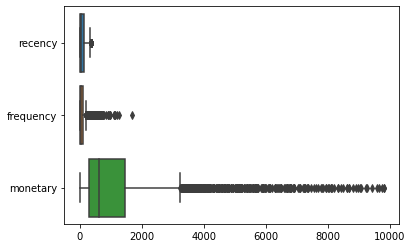

In [5]:
# Create box plots to check for outliers
sns.boxplot(data=rfm,orient="h")

In [6]:
# Calculate Z scores to normalize the data
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(rfm))
print(z)

             recency  frequency  monetary
CustomerID                               
13256.0     0.795485   0.667799  0.803362
16738.0     2.041592   0.667799  0.801337
16454.0     0.494735   0.659217  0.799312
14792.0     0.304260   0.659217  0.799312
17956.0     1.560391   0.667799  0.795262
...              ...        ...       ...
14733.0     0.775435   1.057341  5.666188
13458.0     0.865660   2.602242  5.707361
15078.0     0.865660   3.100044  5.772833
13199.0     0.905760   0.344969  5.822780
13001.0     0.895735   2.233182  5.823455

[3836 rows x 3 columns]


In [7]:
rfm_clean = rfm[(z < 3).all(axis=1)]

### Q. What is the purpose of the above code

Generally, what Z score do is, it indicates how much a given value is differs from the standard deviation. And here our code, we are finiding the z values which values are less then 3.

In [8]:

rfm.shape

(3836, 3)

In [9]:
rfm_clean.shape

(3683, 3)

### Q. Create box plot to check for outliers with the cleaned data and comment on it. Compare it with the previous box plot.

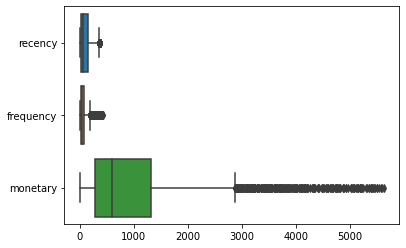

In [10]:
sns.boxplot(data=rfm_clean, orient="h")

### Q. Create the Histogram for R, F, and M for the cleaned data. Comment on them and compare them with the previous histograms



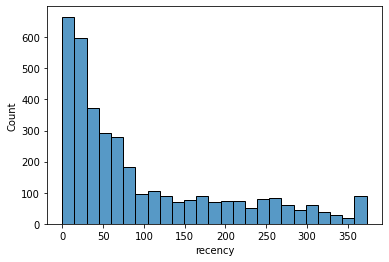

In [11]:
# Histogram for Recency Data (UK)

sns.histplot(data=rfm_clean, x='recency',edgecolor='black', bins=25)

We had generated the histogram with cleaned data, and we can see that there is not much difference in the historgrams, in other qords it is  pretty similar to the histogram with uncleaned data.

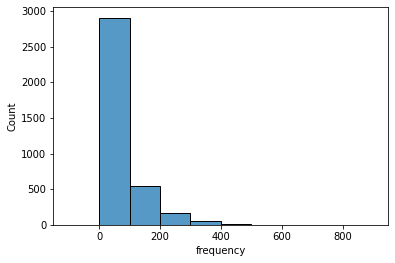

In [12]:
# Histogram for Frequency Data (UK)

hist_bin_width = 100
sns.histplot(data=rfm_clean,x='frequency', edgecolor='black', bins=range(-100, 1000, hist_bin_width))
plt.show()

From the data we cleaned, we plotted the histogram, we can see that it does not have any outliers. which we already removed in cleaning part. The histogram with uncleaned data has some outliers which we can see in part one, but now as we already removed by filtering the z value to be less than 3, we can see that most of the datapoints are in the range of 0 to 400. 

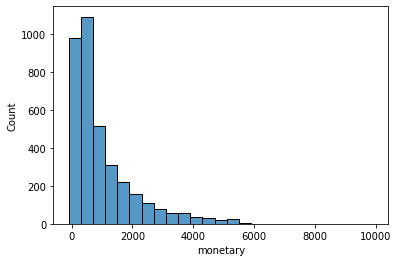

In [13]:
# Histogram for Monetary Data (UK)
hist_bin_width = 400
sns.histplot(data=rfm_clean, x='monetary', edgecolor='black', bins=range(-100, 10000, hist_bin_width))
plt.show()


We can see that the generated new histogram with cleaned data does not have any outliers as we were having in part 1 as we already removed the outliers after cleaning by filtering the z value to be less than 3, and most of the datapoints fall in the range of 0 to 5000. while for the uncleaned dataset had datapoints between 0 to 10,000.

## Perform cluster analysis using K-means clustering with the original rfm dataframe



In [14]:
X = rfm

In [15]:
X.head()

,recency,frequency,monetary
CustomerID,,,
13256.0,14,1,0
16738.0,297,1,3
16454.0,44,2,6
14792.0,63,2,6
17956.0,249,1,12


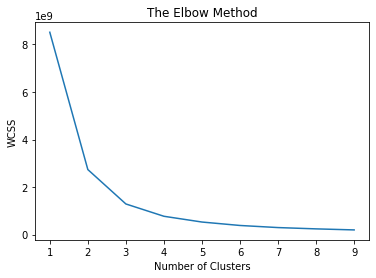

In [16]:
# Choose number of Clusters using the elbow method
# Within cluster sum of squares (wcss)
from sklearn.cluster import KMeans
# start with 10 number of clusters
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters =i, init = 'k-means++', max_iter =300, n_init =10, random_state =0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [17]:
# Fitting K Means to the Datatset using k = 3

kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(X)


In [18]:
y_kmeans

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [19]:
# Adding cluster ID to the dataframe
rfm['Cluster_ID'] = y_kmeans

In [20]:
rfm.head()

,recency,frequency,monetary,Cluster_ID
CustomerID,,,,
13256.0,14,1,0,0
16738.0,297,1,3,0
16454.0,44,2,6,0
14792.0,63,2,6,0
17956.0,249,1,12,0


## Plot the graphs

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


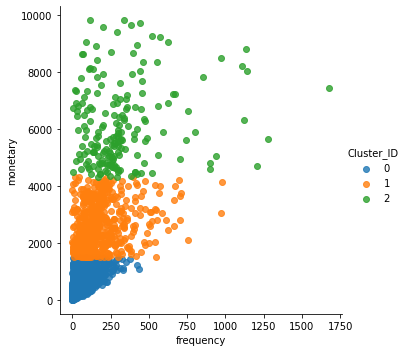

In [21]:
# Create a plot for frequency vs monetary 
facet = sns.lmplot(data=X, x='frequency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)


in above plot we can see that the datapoints are divided into 3 clusters which are 0, 1, 2. we can see that the values in the cluster "1" lie between the x axis value of 4100-10000 and y axis value of 0-1500. the values in the cluster "2" lie between the x axis value of 0-1300 and y axis value of 1200-4200. while the rest The value nearer to the origin. The values in the cluster "0" lie between the x axis value of 0-400 and y axis value of 0-1200. 

Also We can say that, customers who buys frequently, spend less amount. it can be reason because we frequently buy Accessories which only are less costly.


/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


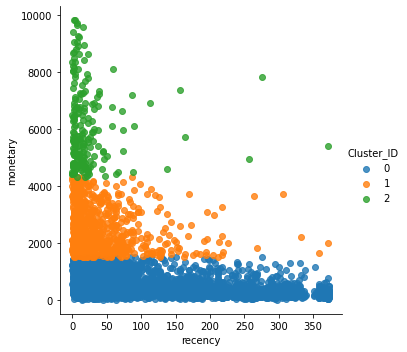

In [22]:
# Create a plot for recency vs monetary
facet2 = sns.lmplot(data=X, x='recency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)


In above plotting we can see that the datapoints are divided into 3 clusters (0, 1, 2). values for the cluster "0" lie between the x axis value of 0-350+ and y axis value of 0-1800. The values of cluster 0 are close to the origin. the values in the cluster "1" lie between the x axis value of 0-200 and y axis value of 4200-10000. the values in the cluster "2" lie between the x axis value of 0-200 and y axis value of 1800-4200.

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


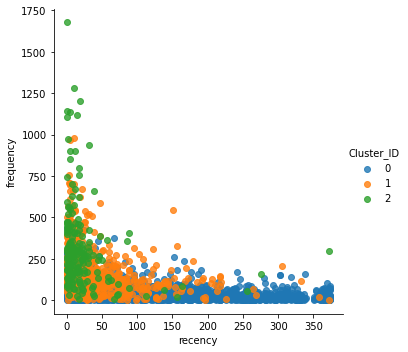

In [23]:
# Create a plot for recency vs frequency
facet2 = sns.lmplot(data=X, x='recency', y='frequency', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)

In the last plotting we can see that the datapoints here are divided into 3 clusters (0, 1, 2). The values in the cluster "0" lie between the x axis value of 0-350 and y axis value of 0-200. The value lie close to the origin.

The values in the cluster "2" lie between the x axis value of 0-200 and y axis value of 0-700.

The values in the cluster "1" lie between the x axis value of 0-150 and y axis value of 0-1250.

Also we can say, that the more recent and more frequent buyers tend to have a impressive better response than those who have shopped less recently or infrequently.

### Q. Perform Cluster Analysis with k=4

In [25]:
# Fitting K Means to the Datatset using k = 4

kmeans = KMeans(n_clusters = 4)
y_kmeans = kmeans.fit_predict(X)
y_kmeans
# Adding cluster ID to the dataframe
rfm['Cluster_ID'] = y_kmeans

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


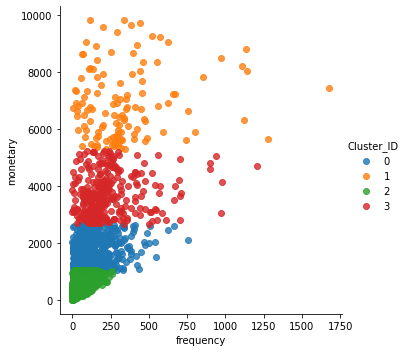

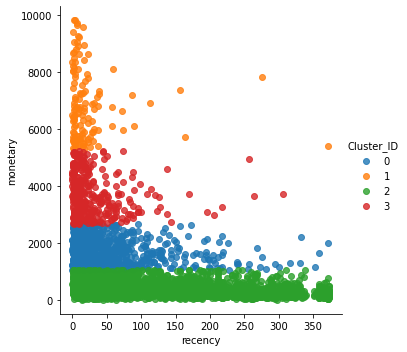

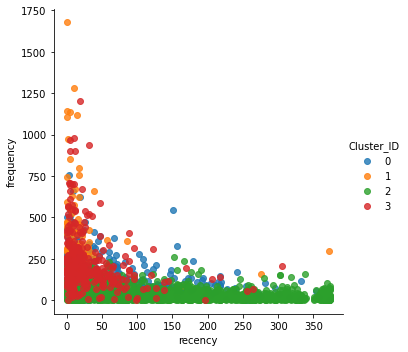

In [26]:
# Create a plot for frequency vs monetary 
facet = sns.lmplot(data=X, x='frequency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs monetary
facet2 = sns.lmplot(data=X, x='recency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs frequency
facet2 = sns.lmplot(data=X, x='recency', y='frequency', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)

Here we divided the data in 4 clusters, that means we are making 4 different clusters for the data points.

For Frequency vs Monetary comparison we can see that values in the cluster "2" placed between the x axis value of 0-250 and y axis value of 0-1000. these are The value are much closer to the origin. The values in the cluster "0" lie between the x axis value of 0-750 and y axis value of 1000-2300. and the values in the cluster "1" lie between the x axis value of 0-500 and y axis value of 5600-6000+. while the values in the cluster "3" lie between the x axis value of 0-1200 and y axis value of 2300-5000.

For Recency vs Monetary comparison we can see that values in the cluster "2" placed between the x axis value of 0-350+ and y axis value of 0-1000. these are The value are much closer to the origin. The values in the cluster "0" lie between the x axis value of 0-350 and y axis value of 1000-2500. and the values in the cluster "1" lie between the x axis value of 0-500 and y axis value of 5600-6000+. while the values in the cluster "3" lie between the x axis value of 0-150 and y axis value of 2300-5000.

For Recency vs Frequency comparison we can see that the values in the cluster "0" lie between the x axis value of 0-350 and y axis value of 0-500. The value lie close to the origin. the values in the cluster "1" lie between the x axis value of 0-100 and y axis value of 0-1250+. the values in the cluster "2" lie between the x axis value of 0-350+ and y axis value of 0-250. while the values in the cluster "3" lie between the x axis value of 0-150 and y axis value of 0-1000

In [27]:
X1 = rfm_clean

### Q. Perform cluster analysis with the outliers removed rfm dataframe. Follow exactly the same steps including the elbow method and plot the graphs and comment on the plots. You decide what k value you should use.

In [32]:
X1.head()

,recency,frequency,monetary
CustomerID,,,
13256.0,14,1,0
16738.0,297,1,3
16454.0,44,2,6
14792.0,63,2,6
17956.0,249,1,12


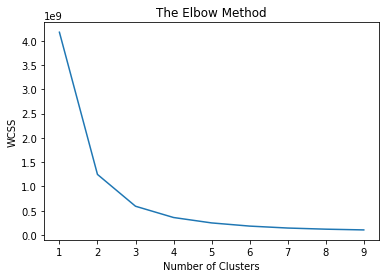

In [33]:
# Choose number of Clusters using the elbow method
# Within cluster sum of squares (wcss)
from sklearn.cluster import KMeans
# start with 10 number of clusters
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters =i, init = 'k-means++', max_iter =300, n_init =10, random_state =0)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [35]:
# Fitting K Means to the Datatset using k = 2

kmeansk_2 = KMeans(n_clusters = 3)
y_kmeansk_2 = kmeansk_2.fit_predict(X1)
y_kmeansk_2


array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [37]:
# Adding cluster ID to the dataframe
rfm_clean['Cluster_ID'] = y_kmeansk_2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


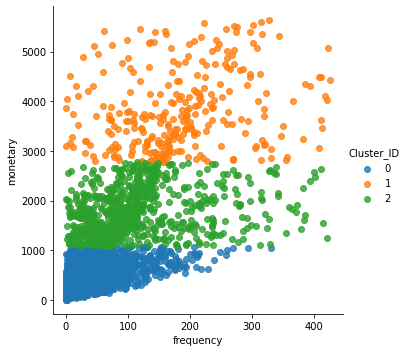

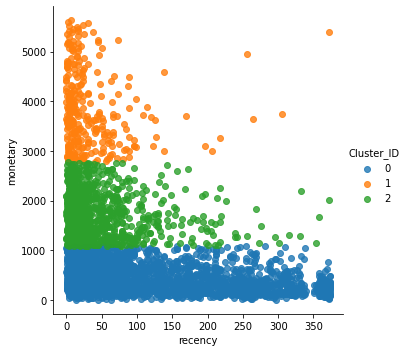

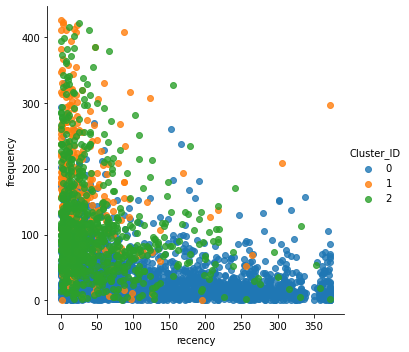

In [38]:
# Create a plot for frequency vs monetary 
facet = sns.lmplot(data=X1, x='frequency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs monetary
facet2 = sns.lmplot(data=X1, x='recency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs frequency
facet2 = sns.lmplot(data=X1, x='recency', y='frequency', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)

Here we divided the data in 3 clusters, that means we are making 3 different clusters for the data points.

For Frequency vs Monetary comparison we can see that values in the cluster "0" placed between the x axis value of 0-250 and y axis value of 0-1000. these are The value are much closer to the origin. The values in the cluster "2" lie between the x axis value of 0-400 and y axis value of 1000-3500. while the values in the cluster "1" lie between the x axis value of 0-400 and y axis value of 3500-5000+.

For Recency vs Monetary comparison we can see that values in the cluster "0" placed between the x axis value of 0-350+ and y axis value of 0-1000. these are The value are much closer to the origin. The values in the cluster "2" lie between the x axis value of 0-350 and y axis value of 1000-2500. while the values in the cluster "1" lie between the x axis value of 0-150 and y axis value of 2300-5000.

For Recency vs Frequency comparison we can see that the values in the cluster "0" lie between the x axis value of 0-350 and y axis value of 0-200. The value lie close to the origin. the values in the cluster "1" lie between the y axis value of 0-400 and x axis value of 0-350+. while the values in the cluster "2" lie between the x axis value of 0-350+ and y axis value of 0-250. 

# Calculate mean for every cluster 


In [41]:
for i in range(4): 
    rfm_clean_mean= rfm_clean.groupby(['Cluster_ID']).mean()

In [42]:
rfm_clean_mean

,recency,frequency,monetary
Cluster_ID,,,
0,118.843787,35.651344,433.631866
1,33.534483,183.531034,3817.748276
2,48.783293,110.561743,1734.914044


In [31]:
%%shell
jupyter nbconvert --to html /content/drive/MyDrive/DAB_303/Project2_Part2.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/DAB_303/Project2_Part2.ipynb to html
[NbConvertApp] Writing 823283 bytes to /content/drive/MyDrive/DAB_303/Project2_Part2.html
